In [1]:
import dataLoader as loader
import HDDMmodelMaker as ddm
import pandas as pd
import time
import matplotlib.pyplot as plt
import hddm
import random
import scipy.stats as st
import numpy as np

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data = dataLoader.parse_files(files)
data = dataLoader.formatData(data, subjects=False)

fixed_s = data[data.treatment == "fix"]
changing_s = data[data.treatment == "changing"]
weak_s = data[data.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()

In [3]:
#model = hddm.HDDM(fixed_s, include='z')
#model.sample(2000, burn=100)
#stat=model.gen_stats() 

In [4]:
#model = modeler.fit_model(fixed_s, 2000, 20)
#stat=model.gen_stats() 

In [5]:
def plot_rounds(data_f, data_c, data_w, param, title):
    param_f = data_f.loc[(data_f.parameter == param), ["mean", "round"]]
    param_c = data_c.loc[(data_c.parameter == param) , ["mean", "round"]]
    param_w = data_w.loc[(data_w.parameter == param) , ["mean", "round"]]
    plt.figure(figsize = (10,10))
    plt.plot(param_f["round"],param_f["mean"], "-o", label = "Fixed")
    plt.plot(param_c["round"], param_c["mean"],"-o", label = "Changing")
    plt.plot(param_w["round"], param_w["mean"], "-o", label = "Weak")
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

# Rounds analysis

Round per round

In [ ]:

st=time.time()
rounds = range(100,101)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[fixed_s["round"] == r], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[changing_s["round"] == r], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[weak_s["round"] == r], 2000, 20)
    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r
    df_c["round"] = r
    df_w["round"] = r
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if r % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds.csv")
        c_rounds.to_csv("changing_rounds.csv")
        w_rounds.to_csv("weak_rounds.csv")

In [ ]:
f2 = f_rounds
c2 = c_rounds
w2 = w_rounds

In [ ]:
f_rounds = pd.read_csv("fixed_rounds10.csv")
c_rounds = pd.read_csv("changing_rounds10.csv")
w_rounds = pd.read_csv("weak_rounds10.csv")



## Five by five rounds

In [ ]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,20)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 5, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 5)) &  (fixed_s["round"] <= ((r+1) * 5))], 10000, 200)
    print("Model: changing, round %d, time: %f" % (r * 5, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 5) &  (changing_s["round"] <= (r+1) * 5)], 10000, 200)
    print("Model: weak, round %d, time: %f" % (r * 5, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 5) &  (weak_s["round"] <= (r+1) * 5)], 10000, 200)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 5
    df_c["round"] = r * 5
    df_w["round"] = r * 5
    if r == 0:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds5.csv")
        c_rounds.to_csv("changing_rounds5.csv")
        w_rounds.to_csv("weak_rounds5.csv")
f_rounds.to_csv("fixed_rounds5.csv")
c_rounds.to_csv("changing_rounds5.csv")
w_rounds.to_csv("weak_rounds5.csv")

In [61]:
#Overlapping rounds

modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,100)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] >= r) &  (fixed_s["round"] <= ((r+5)))], 10000, 200)
    print("Model: changing, round %d, time: %f" % (r, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] >= r) &  (changing_s["round"] <= (r+5))], 10000, 200)
    print("Model: weak, round %d, time: %f" % (r, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] >= r) &  (weak_s["round"] <= (r+5))], 10000, 200)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r 
    df_c["round"] = r 
    df_w["round"] = r 
    if r == 0:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds5.csv")
        c_rounds.to_csv("changing_rounds5.csv")
        w_rounds.to_csv("weak_rounds5.csv")
f_rounds.to_csv("fixed_rounds5.csv")
c_rounds.to_csv("changing_rounds5.csv")
w_rounds.to_csv("weak_rounds5.csv")

Model: Fixed, round 0, time: 0.000505
 [-----------------100%-----------------] 10000 of 10000 complete in 27.4 secModel: changing, round 0, time: 27.463599
 [-----------------100%-----------------] 10000 of 10000 complete in 31.3 secModel: weak, round 0, time: 58.809044
 [-----------------100%-----------------] 10000 of 10000 complete in 20.3 secRounds: 0
Model: Fixed, round 1, time: 79.436855
 [-----------------100%-----------------] 10000 of 10000 complete in 28.8 secModel: changing, round 1, time: 108.367469
 [-----------------100%-----------------] 10000 of 10000 complete in 32.5 secModel: weak, round 1, time: 140.971613
 [-----------------100%-----------------] 10000 of 10000 complete in 15.9 secModel: Fixed, round 2, time: 157.091562
 [-----------------100%-----------------] 10000 of 10000 complete in 26.3 secModel: changing, round 2, time: 183.511508
 [-----------------100%-----------------] 10000 of 10000 complete in 30.7 secModel: weak, round 2, time: 214.303025
 [-----------

 [-----------------100%-----------------] 10000 of 10000 complete in 9.7 secRounds: 22
Model: Fixed, round 23, time: 1567.613164
 [-----------------100%-----------------] 10000 of 10000 complete in 20.5 secModel: changing, round 23, time: 1588.206662
 [-----------------100%-----------------] 10000 of 10000 complete in 27.7 secModel: weak, round 23, time: 1616.021560
 [-----------------100%-----------------] 10000 of 10000 complete in 9.6 secModel: Fixed, round 24, time: 1625.869907
 [-----------------100%-----------------] 10000 of 10000 complete in 20.1 secModel: changing, round 24, time: 1646.102674
 [-----------------100%-----------------] 10000 of 10000 complete in 27.5 secModel: weak, round 24, time: 1673.655713
 [-----------------100%-----------------] 10000 of 10000 complete in 9.6 secRounds: 24
Model: Fixed, round 25, time: 1683.564494
 [-----------------100%-----------------] 10000 of 10000 complete in 20.4 secModel: changing, round 25, time: 1704.014679
 [-----------------100

 [-----------------100%-----------------] 10000 of 10000 complete in 28.9 secModel: weak, round 67, time: 4229.862949
 [-----------------100%-----------------] 10000 of 10000 complete in 9.5 secModel: Fixed, round 68, time: 4239.730119
 [-----------------100%-----------------] 10000 of 10000 complete in 20.6 secModel: changing, round 68, time: 4260.451766
 [-----------------100%-----------------] 10000 of 10000 complete in 28.1 secModel: weak, round 68, time: 4288.668627
 [-----------------100%-----------------] 10000 of 10000 complete in 9.7 secRounds: 68
Model: Fixed, round 69, time: 4298.707119
 [-----------------100%-----------------] 10000 of 10000 complete in 20.8 secModel: changing, round 69, time: 4319.542783
 [-----------------100%-----------------] 10000 of 10000 complete in 27.6 secModel: weak, round 69, time: 4347.213997
 [-----------------100%-----------------] 10000 of 10000 complete in 9.5 secModel: Fixed, round 70, time: 4357.060670
 [-----------------100%--------------

 [-----------------100%-----------------] 10000 of 10000 complete in 20.1 secModel: changing, round 90, time: 5519.785761
 [-----------------100%-----------------] 10000 of 10000 complete in 27.4 secModel: weak, round 90, time: 5547.314100
 [-----------------100%-----------------] 10000 of 10000 complete in 9.9 secRounds: 90
Model: Fixed, round 91, time: 5557.649650
 [-----------------100%-----------------] 10000 of 10000 complete in 19.9 secModel: changing, round 91, time: 5577.681168
 [-----------------100%-----------------] 10000 of 10000 complete in 26.9 secModel: weak, round 91, time: 5604.685113
 [-----------------100%-----------------] 10000 of 10000 complete in 9.9 secModel: Fixed, round 92, time: 5614.899494
 [-----------------100%-----------------] 10000 of 10000 complete in 19.7 secModel: changing, round 92, time: 5634.678913
 [-----------------100%-----------------] 10000 of 10000 complete in 26.6 secModel: weak, round 92, time: 5661.401159
 [-----------------100%----------

In [ ]:
#f_rounds = pd.read_csv("fixed_rounds5.csv")
#c_rounds = pd.read_csv("changing_rounds5.csv")
#w_rounds = pd.read_csv("weak_rounds5.csv")

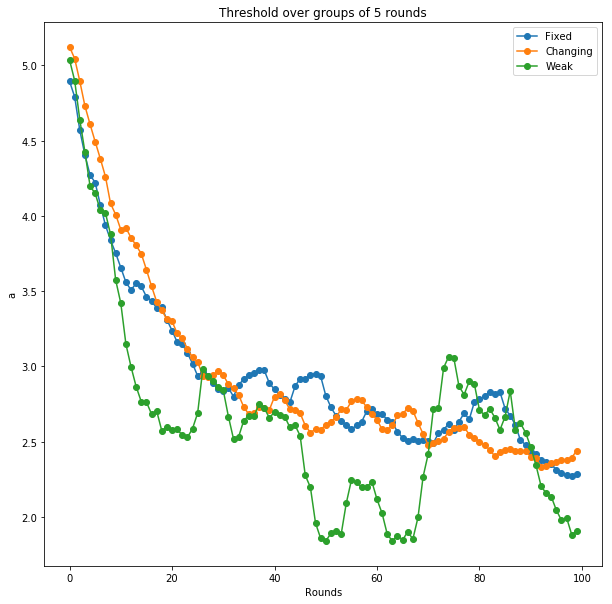

In [67]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")


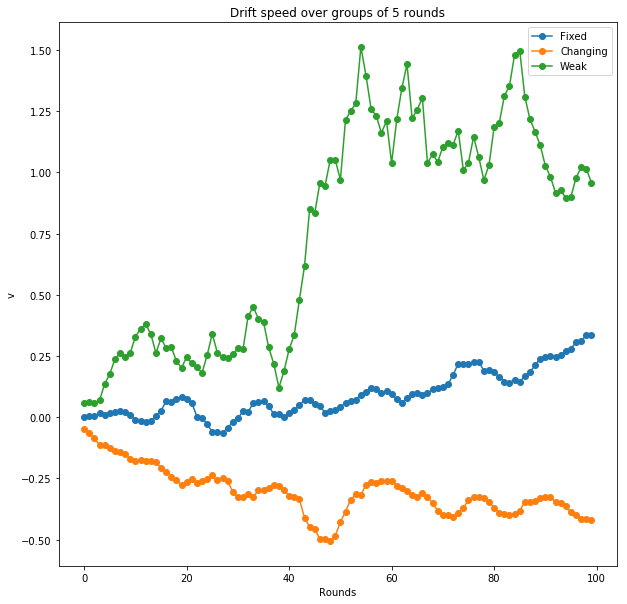

In [68]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

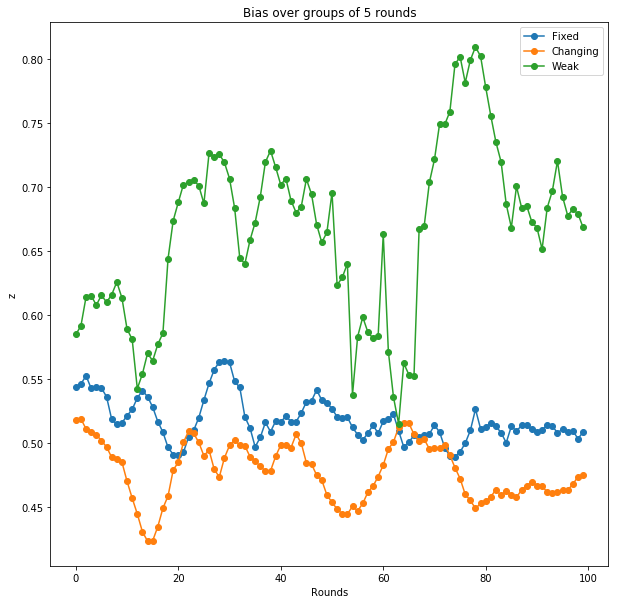

In [69]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

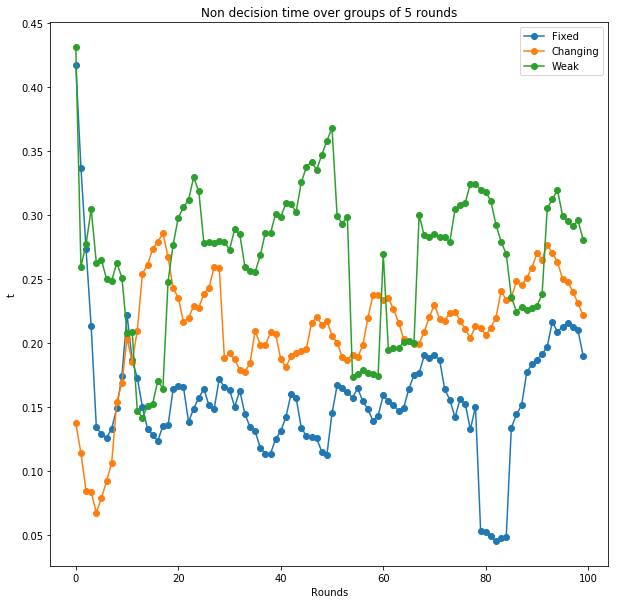

In [70]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

## Ten by ten rounds

In [ ]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Ten by Ten rounds
st=time.time()
rounds = range(0,10)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 10, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 10)) &  (fixed_s["round"] <= ((r+1) * 10))], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r * 10, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 10) &  (changing_s["round"] <= (r+1) * 10)], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r * 10, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 10) &  (weak_s["round"] <= (r+1) * 10)], 2000, 20)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 10
    df_c["round"] = r * 10
    df_w["round"] = r * 10
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*10) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds10.csv")
        c_rounds.to_csv("changing_rounds10.csv")
        w_rounds.to_csv("weak_rounds10.csv")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

In [ ]:
#Reponse time vs threshold
plt.figure(figsize = (14,10))
f_thres = f_rounds.loc[f_rounds.parameter == "a", ["round", "mean"]]

plt.plot(fixed_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(f_thres["round"], f_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Fixed PD")


In [ ]:
#Changing 
plt.figure(figsize = (14,10))
c_thres = c_rounds.loc[c_rounds.parameter == "a", ["round", "mean"]]

plt.plot(changing_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(c_thres["round"], c_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Changing PD")


In [ ]:
#Weak
plt.figure(figsize = (14,10))
w_thres = w_rounds.loc[w_rounds.parameter == "a", ["round", "mean"]]

plt.plot(weak_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(w_thres["round"], w_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Weak PD")

In [ ]:
a_values = []
for i in range(10):
    #np.random.seed(1234)
    #random.seed(1234)
    model = hddm.HDDM(fixed_s, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


In [ ]:
a_values

In [ ]:
cr = []
for i in range(1, 100):
    f_i = fixed_s.loc[fixed_s["round"] == i]
    cr.append(len(f_i.loc[f_i['response']==1])/float(len(f_i)))

z_fix = f_rounds.loc[f_rounds.parameter == "z", ["round", "mean"]]
plt.figure(figsize = (14,14))
plt.plot(range(1, 100), cr, "-o", label = "Cooperation rate")
plt.plot(z_fix["round"], z_fix["mean"], "-o", label = "Bias")
plt.legend(loc = "best")
plt.ylabel("Coop Rate | Bias")
plt.xlabel("Rounds")
plt.title("Cooperation rate and Bias over rounds for Fixed PD")


# Context analysis

We have the hypothesis that the reaction times and parameters differ when different contexts are taking place

How the people react when the previous action of the other player was X?

In [6]:
data = hddm.load_csv('./outputs/output_data.dat')
session = data["player"].str.split("_", n=1, expand=True)
data["session"] = session[0]
data["treatment"] = ""
data.loc[data["session"].isin(['s1m5', 's2m5', 's4m8', 's8n3', 's9n3', 's10n5']), 'treatment'] = "fix"
data.loc[data["session"].isin(['s5m20', 's6m22', 's7m22', 's11n9', 's12n11', 's13n12']), 'treatment'] = "changing"
data.loc[data["session"].isin(['s3m7']), 'treatment'] = "weak"
data = data.loc[data.treatment == "fix"]
data.head()

,round,player,action_player,opponent,action_opponent,payoff,time_php,time_js,who_played,session,treatment
1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,4600,user,s4m8,fix
1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4055,user,s4m8,fix
1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5394,user,s4m8,fix
1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7806,user,s4m8,fix
1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,15067,user,s4m8,fix


In [7]:
#Time intensive

data["actions"] = ""
nrounds = data["round"].unique()
players = data.player.unique()
for r in nrounds:
    for p in players:
        action1 = ""
        if r == 1: action1 = "00"
        else:
            action1 = "%s%s" % (data.loc[(data["round"] == r-1) & (data["player"] == p), "action_player"].item(),
                                data.loc[(data["round"] == r-1) & (data["player"] == p), "action_opponent"].item())
        data.loc[(data["round"] == r) & (data["player"] == p), ['actions']] = "%s%s" % (action1, data.loc[(data["round"] == r) & (data["player"] == p), "action_player"].item())
data

,round,player,action_player,opponent,action_opponent,payoff,time_php,time_js,who_played,session,treatment,actions
1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,4600,user,s4m8,fix,00D
1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4055,user,s4m8,fix,00C
1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5394,user,s4m8,fix,00C
1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7806,user,s4m8,fix,00C
1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,15067,user,s4m8,fix,00D
1805,1,s4m8_usuario10,C,['s4m8_usuario9'],D,0,12510.700226,12483,user,s4m8,fix,00C
1806,1,s4m8_usuario8,C,['s4m8_usuario1'],C,3,10614.599943,10559,user,s4m8,fix,00C
1807,1,s4m8_usuario1,C,['s4m8_usuario8'],C,3,4645.099878,4622,user,s4m8,fix,00C
1808,1,s4m8_usuario11,D,['s4m8_usuario4'],D,1,26435.199976,26404,user,s4m8,fix,00D
1809,1,s4m8_usuario4,D,['s4m8_usuario11'],D,1,4593.400002,4568,user,s4m8,fix,00D


In [8]:
#Initial actions
defInitial = data.loc[data.actions == "00D"]
cooInitial = data.loc[data.actions == "00C"]

print("Defectors: %d, Cooperators %d" % (len(defInitial.index), len(cooInitial.index)))



Defectors: 27, Cooperators 31


In [9]:
defPlayers = data.loc[data.player.isin(defInitial.player.unique())]
cooPlayers = data.loc[data.player.isin(cooInitial.player.unique())]

defPlayers[['round', 'action_player']].groupby(['action_player']).agg("count")

,round
action_player,
C,1331
D,1369


Text(0,0.5,'Rounds')

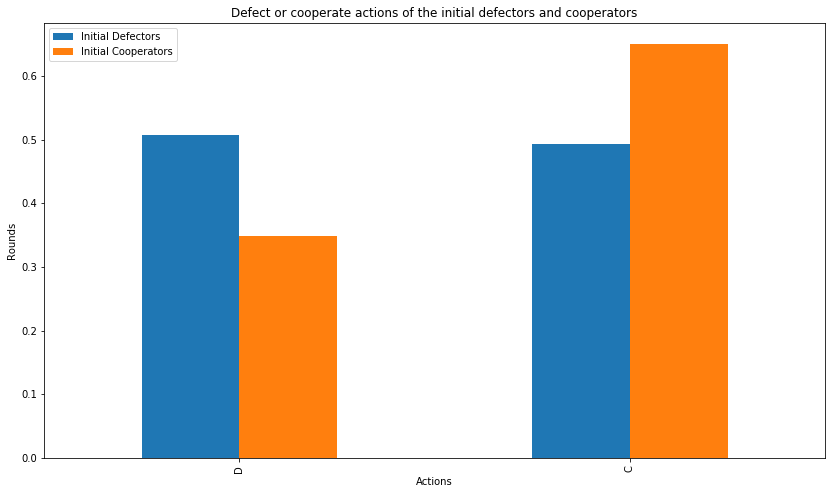

In [10]:
coop_counts = defPlayers['action_player'].value_counts(normalize = True).rename('Initial Defectors').to_frame()\
               .join(cooPlayers['action_player'].value_counts(normalize = True).rename('Initial Cooperators').to_frame())
coop_counts.plot(kind='bar',figsize=(14, 8), title = "Defect or cooperate actions of the initial defectors and cooperators")
plt.xlabel("Actions")
plt.ylabel("Rounds")

Text(0,0.5,'Rounds')

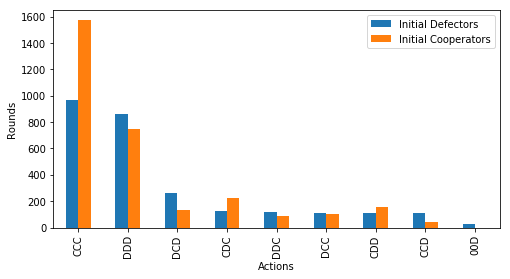

In [11]:

actions_counts = defPlayers['actions'].value_counts().rename('Initial Defectors').to_frame()\
               .join(cooPlayers['actions'].value_counts().rename('Initial Cooperators').to_frame())
actions_counts.plot(kind='bar',figsize=(8, 4))
plt.xlabel("Actions")
plt.ylabel("Rounds")

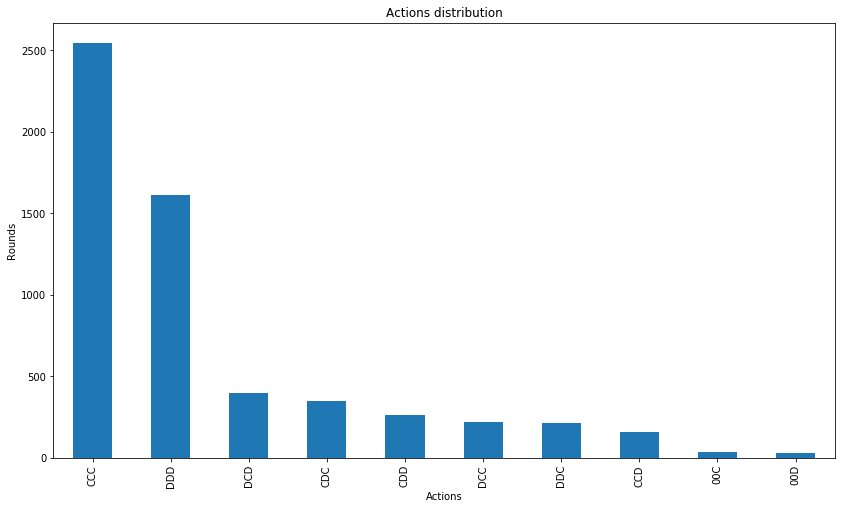

In [12]:
# Actions. How to read: XYZ = I did action X in the previous round, the opponent did action Y, hence I do action Z.


data['actions'].value_counts().plot(kind = "bar", figsize =(14, 8), title = "Actions distribution")
plt.xlabel("Actions")
plt.ylabel("Rounds")
plt.show()

In [13]:
#Some more format

#del data["who_played"], data["opponent"], data["payoff"], data["time_php"], data["action_opponent"]
data.rename(columns={'time_js': 'rt'}, inplace=True)
data['rt'] = data.rt.astype(int)
data["response"] = data["action_player"]
data.loc[data['response'] == "C", "response"] = 1.0
data.loc[data['response'] == "D", "response"] = 0.0
data["rt"] = data["rt"] / 1000
data = hddm.utils.flip_errors(data)
data["abs_time"] = data["rt"].abs()
data.head()

,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,response,abs_time
1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,-4.600,user,s4m8,fix,00D,0,4.600
1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4.055,user,s4m8,fix,00C,1,4.055
1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5.394,user,s4m8,fix,00C,1,5.394
1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7.806,user,s4m8,fix,00C,1,7.806
1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,-15.067,user,s4m8,fix,00D,0,15.067


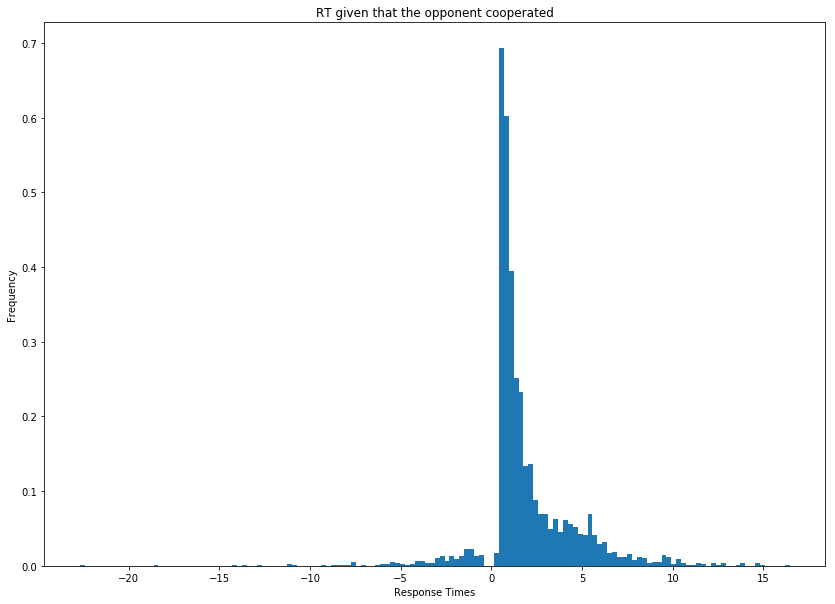

In [14]:
#Reaction times:
#Given than the opponent cooperated, cooperating seems faster.

prevCoop = data.loc[data.actions.isin(["CCD", "CCC"])]

plt.figure(figsize = (14,10))
plt.hist(prevCoop.rt, density = True, bins = "auto")
plt.xlabel("Response Times")
plt.ylabel("Frequency")
plt.title("RT given that the opponent cooperated")
plt.show()

In [15]:
#Test for equal distributions
cTime = prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]].values
dTime = np.array(prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]].values)
#cTime

In [16]:
st.kruskal(prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]], prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]])

KruskalResult(statistic=38.2303145975757, pvalue=6.286810964549385e-10)

In [17]:
prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]].mean()

abs_time    2.211024
dtype: float64

In [18]:
prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]].mean()

abs_time    3.330312
dtype: float64

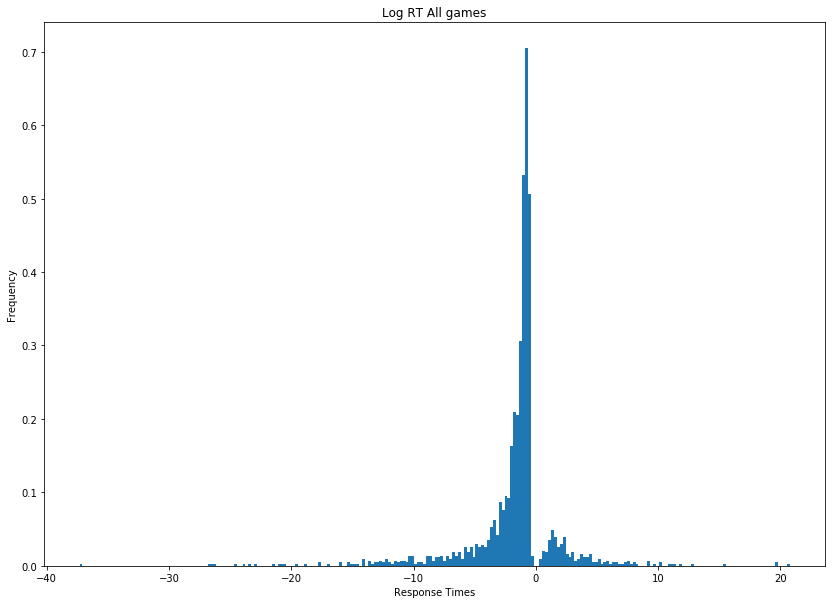

In [19]:
prevDef = data.loc[data.actions.isin(["DDC", "DDD"])]

plt.figure(figsize = (14,10))
plt.hist(prevDef.rt, density = True, bins = "auto")
plt.xlabel("Response Times")
plt.ylabel("Frequency")
plt.title("Log RT All games")
plt.show()

In [20]:
#Test for equal distributions
cTime = prevDef.loc[prevDef.action_player == "C", ["abs_time"]].values
dTime = np.array(prevDef.loc[prevDef.action_player == "D", ["abs_time"]].values)
#cTime

In [21]:
st.kruskal(cTime, dTime)

KruskalResult(statistic=82.87524043184794, pvalue=8.739909163755581e-20)

In [22]:
prevDef.loc[prevDef.action_player == "C", ["abs_time"]].mean()

abs_time    3.481327
dtype: float64

In [23]:
prevDef.loc[prevDef.action_player == "D", ["abs_time"]].mean()

abs_time    2.426271
dtype: float64

Text(0,0.5,'RT')

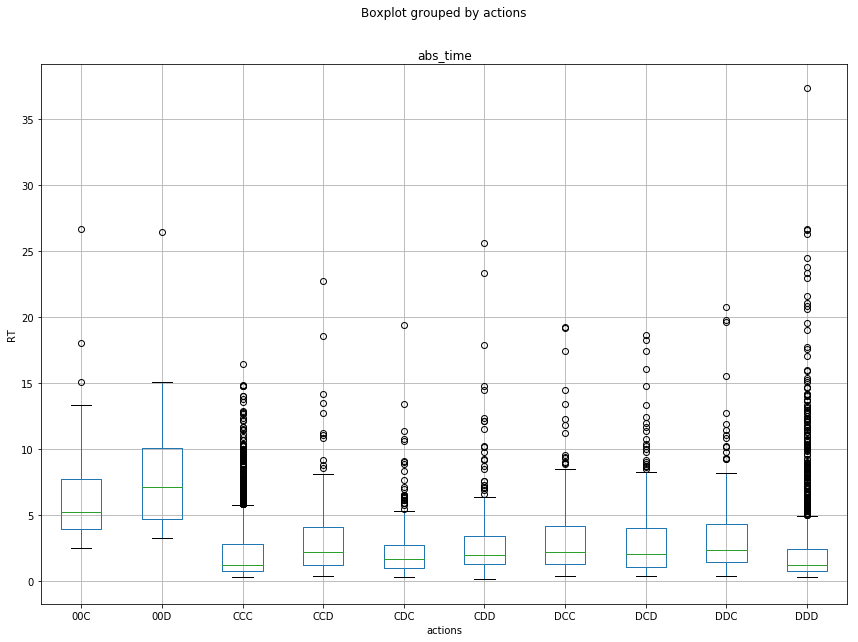

In [24]:

data.boxplot(column = "abs_time", by = "actions", figsize = (14,10))
plt.ylabel("RT")

In [151]:
def roundModel (data, column, window):
    groups = list(data[column].unique())
    print(groups)
    modeler = ddm.HDDMmodelMaker()
    st = time.time()
    rounds = range(0, 100)
    roundsDf = pd.DataFrame()
    for g in groups:
        df = data.loc[data[column]==g]
        print (str(df["round"].unique()))
        for r in rounds:
            try:
                model = modeler.fit_model(df.loc[(df["round"] >= r) & (df["round"] <= ((r + window)))], 5000, 200)
                print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
                modStats = modeler.get_stats(model)
                modStats["round"] = r
                if r == 0:
                    roundsDf = modStats
                else:
                    roundsDf = roundsDf.append(modStats, ignore_index = True)
                if r%10 == 0:
                    roundsDf.to_csv("%s_rounds.csv" % (g))
            except: break
        roundsDf.to_csv("%s_rounds.csv" % (g))

In [152]:
roundModel(data, "actions", 10)

['00D', '00C', 'DCD', 'CDC', 'CCC', 'CDD', 'CCD', 'DDC', 'DCC', 'DDD']
[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec
Model: 00D, round 0, time: 12.394315

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 00D, round 1, time: 25.131589

[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 sec
Model: 00C, round 0, time: 37.991768

 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 sec
Model: 00C, round 1, time: 50.802491

[  2   3   4   5   6   7  11  12  14  15  16  17  22  27  32  39  40  42
  44  48  49  50  53  54  57  58  69  72  81  89  95  97   8  10  13  19
  20  21  24  25  28  29  31  33  34  35  36  37  41  43  45  46  47  51
  52  55  56  59  60  61  62  63  64  65  66  67  68  70  71  74  75  76
  78  79  80  85  86  91  93  96  98 100   9  18  26  30  38  73  77  84
  87  88  90  92  94  99  23]
 [-----------------100%-----------------] 5000 of 5000 complete in 10.

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model: CDC, round 31, time: 851.822044

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 32, time: 856.761939

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 33, time: 861.698135

 [-----------------100%-----------------] 5000 of 5000 complete in 4.5 sec
Model: CDC, round 34, time: 866.599940

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 35, time: 871.539152

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 36, time: 876.524072

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 37, time: 881.464110

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 38, time: 886.395998

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model

 [-----------------100%-----------------] 5000 of 5000 complete in 8.7 sec
Model: CCC, round 0, time: 1226.861724

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 1, time: 1236.043115

 [-----------------100%-----------------] 5000 of 5000 complete in 8.9 sec
Model: CCC, round 2, time: 1245.372045

 [-----------------100%-----------------] 5000 of 5000 complete in 8.9 sec
Model: CCC, round 3, time: 1254.630267

 [-----------------100%-----------------] 5000 of 5000 complete in 9.1 sec
Model: CCC, round 4, time: 1264.104034

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 5, time: 1273.258364

 [-----------------100%-----------------] 5000 of 5000 complete in 8.6 sec
Model: CCC, round 6, time: 1282.272736

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 7, time: 1291.452290

 [-----------------100%-----------------] 5000 of 5000 complete in 9.6 sec
Model

 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 sec
Model: CCC, round 71, time: 1840.416602

 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 sec
Model: CCC, round 72, time: 1849.149470

 [-----------------100%-----------------] 5000 of 5000 complete in 8.5 sec
Model: CCC, round 73, time: 1858.044801

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CCC, round 74, time: 1867.702514

 [-----------------100%-----------------] 5000 of 5000 complete in 9.5 sec
Model: CCC, round 75, time: 1877.598787

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 sec
Model: CCC, round 76, time: 1887.356501

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 sec
Model: CCC, round 77, time: 1897.130293

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CCC, round 78, time: 1906.812470

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 s

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 7, time: 2805.606492

 [-----------------100%-----------------] 5000 of 5000 complete in 7.4 sec
Model: CCD, round 8, time: 2813.351806

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: CCD, round 9, time: 2821.629199

 [-----------------100%-----------------] 5000 of 5000 complete in 7.5 sec
Model: CCD, round 10, time: 2829.512776

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 11, time: 2837.191812

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: CCD, round 12, time: 2844.656010

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 13, time: 2852.326461

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: CCD, round 14, time: 2860.496286

 [-----------------100%-----------------] 5000 of 5000 complete in 7.7 sec


 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 78, time: 3254.576960

 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 79, time: 3260.052764

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: CCD, round 80, time: 3265.437208

 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 81, time: 3270.921028

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: CCD, round 82, time: 3276.668218

 [-----------------100%-----------------] 5000 of 5000 complete in 6.0 sec
Model: CCD, round 83, time: 3283.069767

 [-----------------100%-----------------] 5000 of 5000 complete in 5.5 sec
Model: CCD, round 84, time: 3289.061719

 [-----------------100%-----------------] 5000 of 5000 complete in 5.2 sec
Model: CCD, round 85, time: 3294.692553

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 s

 [-----------------100%-----------------] 5000 of 5000 complete in 7.2 sec
Model: DDC, round 46, time: 3730.570270

 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 sec
Model: DDC, round 47, time: 3739.029916

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: DDC, round 48, time: 3747.285739

 [-----------------100%-----------------] 5000 of 5000 complete in 7.6 sec
Model: DDC, round 49, time: 3755.320035

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: DDC, round 50, time: 3762.892842

 [-----------------100%-----------------] 5000 of 5000 complete in 6.7 sec
Model: DDC, round 51, time: 3769.985668

 [-----------------100%-----------------] 5000 of 5000 complete in 6.9 sec
Model: DDC, round 52, time: 3777.303602

 [-----------------100%-----------------] 5000 of 5000 complete in 6.6 sec
Model: DDC, round 53, time: 3784.337960

 [-----------------100%-----------------] 5000 of 5000 complete in 6.9 s

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: DCC, round 84, time: 4670.882264

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: DCC, round 85, time: 4676.316586

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: DCC, round 86, time: 4682.114809

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DCC, round 87, time: 4687.848797

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DCC, round 88, time: 4693.622342

 [-----------------100%-----------------] 5000 of 5000 complete in 6.4 sec
Model: DCC, round 89, time: 4700.481813

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: DCC, round 90, time: 4708.062135

 [-----------------100%-----------------] 5000 of 5000 complete in 7.7 sec
Model: DCC, round 91, time: 4716.185378

 [-----------------100%-----------------] 5000 of 5000 complete in 7.6 s

In [26]:
def plot_rounds_context(groups, param, title, normalize = False):
    plt.figure(figsize = (10,10))
    for g in groups:
        data = pd.read_csv("%s_rounds.csv" % (g))
        param_df = data.loc[(data.parameter == param), ["mean", "round"]]
        if normalize:
            if param == "v":
                param_df["mean"] = param_df["mean"].abs()
        plt.plot(param_df["round"],param_df["mean"], "-o", label = g)
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

In [100]:
#Overlapping rounds

modeler = ddm.HDDMmodelMaker()
CC_rounds = pd.DataFrame()
CD_rounds = pd.DataFrame()
DC_rounds = pd.DataFrame()
DD_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,100)

for r in rounds:
    print("\nModel: CC, round %d, time: %f\n" % (r, time.time() - st))
    m_CC = modeler.fit_model(CCdf.loc[(CCdf["round"] >= r) &  (CCdf["round"] <= ((r+5)))], 5000, 200)
    print("\nModel: CD, round %d, time: %f\n" % (r, time.time() - st))
    m_CD = modeler.fit_model(CDdf.loc[(CDdf["round"] >= r) &  (CDdf["round"] <= (r+5))], 5000, 200)
    print("\nModel: DC, round %d, time: %f\n" % (r, time.time() - st))
    m_DC = modeler.fit_model(DCdf.loc[(DCdf["round"] >= r) &  (DCdf["round"] <= (r+5))], 5000, 200)
    print("\nModel: DD, round %d, time: %f\n" % (r, time.time() - st))
    m_DD = modeler.fit_model(DDdf.loc[(DDdf["round"] >= r) &  (DDdf["round"] <= (r+5))], 5000, 200)

    df_CC = modeler.get_stats(m_CC)
    df_CD = modeler.get_stats(m_CD)
    df_DC = modeler.get_stats(m_DC)
    df_DD = modeler.get_stats(m_DD)
    df_CC["round"] = r 
    df_CD["round"] = r 
    df_DC["round"] = r 
    df_DD["round"] = r 
    if r == 0:
        CC_rounds = df_CC
        CD_rounds = df_CD
        DC_rounds = df_DC
        DD_rounds = df_DD
    else:
        CC_rounds = CC_rounds.append(df_CC, ignore_index=True)
        CD_rounds = CD_rounds.append(df_CD, ignore_index=True)
        DC_rounds = DC_rounds.append(df_DC, ignore_index=True)
        DD_rounds = DD_rounds.append(df_DD, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        CC_rounds.to_csv("CC_rounds.csv")
        CD_rounds.to_csv("CD_rounds.csv")
        DC_rounds.to_csv("DC_rounds.csv")
        DD_rounds.to_csv("DD_rounds.csv")
CC_rounds.to_csv("CC_rounds.csv")
CD_rounds.to_csv("CD_rounds.csv")
DC_rounds.to_csv("DC_rounds.csv")
DD_rounds.to_csv("DD_rounds.csv")


Model: CC, round 0, time: 0.000645

 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 sec
Model: CD, round 0, time: 8.061327

 [-----------------100%-----------------] 5000 of 5000 complete in 10.0 sec
Model: DC, round 0, time: 18.176348

 [-----------------100%-----------------] 5000 of 5000 complete in 8.6 sec
Model: DD, round 0, time: 26.890924

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 secRounds: 0

Model: CC, round 1, time: 36.891776

 [-----------------100%-----------------] 5000 of 5000 complete in 8.1 sec
Model: CD, round 1, time: 45.090712

 [-----------------100%-----------------] 5000 of 5000 complete in 9.1 sec
Model: DC, round 1, time: 54.314754

 [-----------------100%-----------------] 5000 of 5000 complete in 8.2 sec
Model: DD, round 1, time: 62.601492

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CC, round 2, time: 72.398692

 [-----------------100%-----------------] 5000 of 5000 co

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DD, round 35, time: 1481.564759

 [-----------------100%-----------------] 5000 of 5000 complete in 5.8 sec
Model: CC, round 36, time: 1488.015052

 [-----------------100%-----------------] 5000 of 5000 complete in 6.7 sec
Model: CD, round 36, time: 1494.822803

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: DC, round 36, time: 1500.315591

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model: DD, round 36, time: 1505.070757

 [-----------------100%-----------------] 5000 of 5000 complete in 5.7 secRounds: 36

Model: CC, round 37, time: 1511.471471

 [-----------------100%-----------------] 5000 of 5000 complete in 6.4 sec
Model: CD, round 37, time: 1518.002246

 [-----------------100%-----------------] 5000 of 5000 complete in 5.9 sec
Model: DC, round 37, time: 1524.031974

 [-----------------100%-----------------] 5000 of 5000 complete in 4.

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: DD, round 70, time: 2245.931183

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 secRounds: 70

Model: CC, round 71, time: 2251.743248

 [-----------------100%-----------------] 5000 of 5000 complete in 5.8 sec
Model: CD, round 71, time: 2257.691470

 [-----------------100%-----------------] 5000 of 5000 complete in 4.4 sec
Model: DC, round 71, time: 2262.191785

 [-----------------100%-----------------] 5000 of 5000 complete in 4.4 sec
Model: DD, round 71, time: 2266.677130

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: CC, round 72, time: 2272.426615

 [-----------------100%-----------------] 5000 of 5000 complete in 6.0 sec
Model: CD, round 72, time: 2278.486654

 [-----------------100%-----------------] 5000 of 5000 complete in 4.5 sec
Model: DC, round 72, time: 2283.061982

 [-----------------100%-----------------] 5000 of 5000 complete in 4.

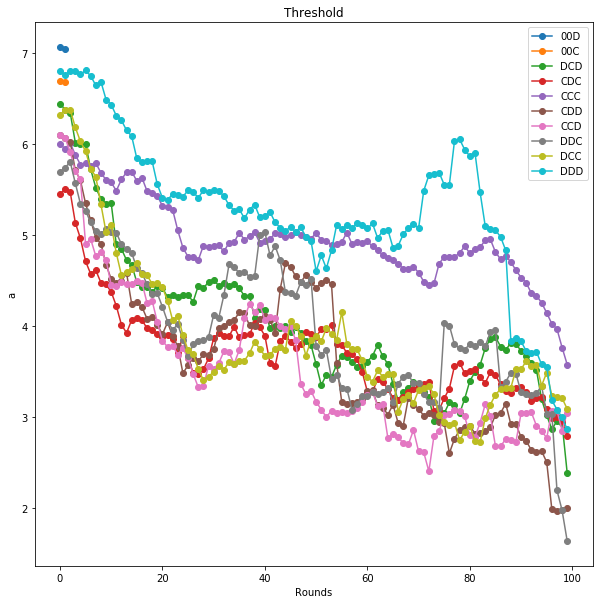

In [162]:
plot_rounds_context(list(data.actions.unique()), "a", "Threshold")

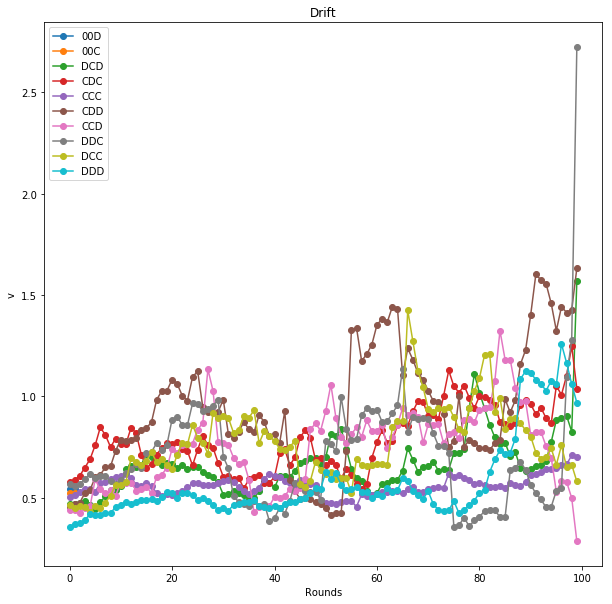

In [27]:
plot_rounds_context(list(data.actions.unique()), "v", "Drift", normalize = True)

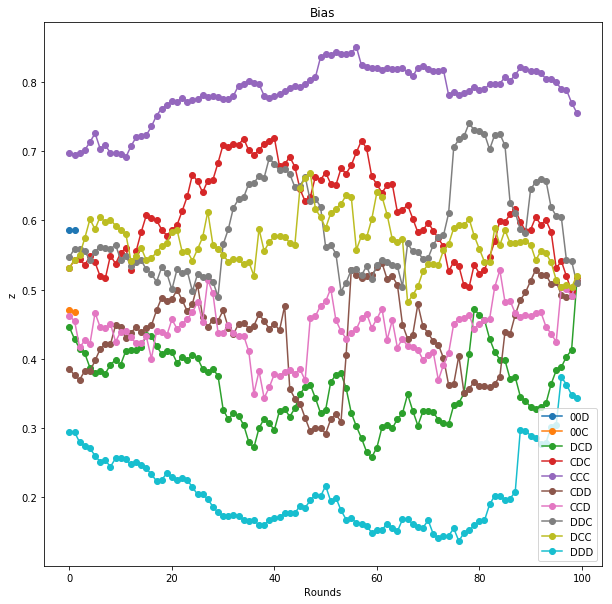

In [164]:
plot_rounds_context(list(data.actions.unique()), "z", "Bias")

# Subjects analysis

In [ ]:
import seaborn as sns
sns.set(style="white")
import numpy as np
from scipy import stats

In [ ]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data_s = dataLoader.parse_files(files)
data_s = dataLoader.formatData(data_s, subjects=True)

fixed_sj = data_s[data_s.treatment == "fix"]
changing_sj = data_s[data_s.treatment == "changing"]
weak_sj = data_s[data_s.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds_s = pd.DataFrame()
c_rounds_s = pd.DataFrame()
w_rounds_s = pd.DataFrame()

In [ ]:
def plot_params(stats_df, title):
    parameters = ["a", "v", "z", "t"]
    fig, axs = plt.subplots(4, 4)
    fig.set_size_inches(13,13) 
    fig.suptitle('Correlation plots with Pearson coefficient, %s, (subjects model)' % (title), fontsize=16)
    i = 0
    j = 0
    for p2 in parameters:
        j = 0
        for p in parameters:
            x = stats_df.loc[stats_df.param == p, "mean"]
            y = stats_df.loc[stats_df.param == p2, "mean"]
            axs[i,j].scatter(x, y)
            axs[i,j].set_title("Corr: %f, p value: %s" % (np.round(stats.pearsonr(x,y)[0], 2), np.round(stats.pearsonr(x,y)[1], 4)))
            j = j + 1
        i = i + 1

    axs.flat[0].set(ylabel='a')
    axs.flat[4].set(ylabel='v')
    axs.flat[8].set(ylabel='z')
    axs.flat[12].set(ylabel='t')

    axs.flat[12].set(xlabel='a')
    axs.flat[13].set(xlabel='v')
    axs.flat[14].set(xlabel='z')
    axs.flat[15].set(xlabel='t')

In [ ]:
def pearson(x, y, **kws):
    ax = plt.gca()
    r, p = stats.pearsonr(x, y)
    ax.annotate("r = %f, p = %f" % (r,p),
                xy=(.1, .9), xycoords=ax.transAxes)

def spearman(x, y, **kws):
    ax = plt.gca()
    s, p = stats.spearmanr(x, y)
    ax.annotate("s = %f, p = %f" % (s,p),
                xy=(.1, .9), xycoords=ax.transAxes)
    
    

In [ ]:
def grid_plot(stats_df):
    z = list(stats_df.loc[stats_df.param == "z", "mean"])
    a = list(stats_df.loc[stats_df.param == "a", "mean"])
    t = list(stats_df.loc[stats_df.param == "t", "mean"])
    v = list(stats_df.loc[stats_df.param == "v", "mean"])

    dict = {"a": a , "v": v, "z":z, "t": t}

    samp = pd.DataFrame(dict)
    g = sns.PairGrid(samp, palette=["red"])
    g.map_upper(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_lower(corrfunc)
    g.map_upper(spearman)

In [ ]:

f_all = modeler.fit_model(fixed_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(f_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(pearson)
g.map_upper(spearman)


In [ ]:
#0-25
f_25 = modeler.fit_model(fixed_sj[fixed_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(f_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
f_26_50 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
f_51_75 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
f_76_100 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_76_100, True)
grid_plot(stats_df)

In [ ]:
##Changing

In [ ]:

c_all = modeler.fit_model(changing_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(c_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


In [ ]:
#0-25
c_25 = modeler.fit_model(changing_sj[changing_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(c_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
c_26_50 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
c_51_75 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
c_76_100 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_76_100, True)
grid_plot(stats_df)

In [ ]:
##Weak

In [ ]:

w_all = modeler.fit_model(weak_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(w_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


In [ ]:
#0-25
w_25 = modeler.fit_model(weak_sj[weak_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(w_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
w_26_50 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
w_51_75 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
w_76_100 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_76_100, True)
grid_plot(stats_df)

## Simulating data to test package

In [ ]:
D = 1 #Difusion constant
z =10 # Initial condition (bias)
v = .1 #Drift
alpha = 12 # upper barrier value
N = 10000
t_mc = [0] * N 
dt = 0.01

In [ ]:
for i in range(1, N):
   x = z
   n = 0
   while x > 0:
      x = x - v * dt + D ** .5 * np.random.normal() * dt**0.5
      n = n + 1
      if x > alpha:
         x = z
         n = 0
   t_mc[i] = n * dt

In [ ]:
plt.figure(figsize = (14,10))
plt.plot(t_mc)

In [ ]:
## Second method

#Simulate random walk with a drift. 
#You start from z and in each time step you add a random number from Gaussian distribution
#and constant drift v towards one of the decisions. 
#You continue until you cross one of the barriers a or -a and note that as a decision time with the decision. 
#Then fit this distribution fro which you know exactly z, v and a using the package.
rounds = 1
sim = pd.DataFrame()

for r in range(rounds):
    subjects = 10000
    dec_times = [0] * subjects
    responses = [0] * subjects
    for sub in range(subjects):
        z = 2 # Initial condition (bias)
        v = -0.6  # Drift
        a = 5  # upper barrier value
        N = 100000
        t0 = 0.01  # non decision time
        s = z  # deliberation status
        D = 1 #Difusion constant
        for i in range(N):
            rand = np.random.normal()
            if (s < a) and s > 0:
                s = s - v * t0 + D ** .5 * np.random.randn() * t0**0.5
                #dt = dt + 1
            else:
                if s > 0:
                    responses[sub] = 1
                dec_times[sub] = t0 * i
                break
        if dec_times[sub] == 0.0:
            print ("no decision")
                
    dic = {"player": range(subjects), "rt": dec_times, 'response': responses, "round": [r] * subjects}
    sim_times = pd.DataFrame(dic)
    if r == 0:
        sim = sim_times
    else:
        sim = sim.append(sim_times, ignore_index = True)

In [ ]:
sim.loc[sim.response == 1, "rt"].mean()

In [ ]:
sim.loc[sim.response == 0, "rt"].mean()

In [ ]:
sim.to_csv("sim_times.csv")

In [ ]:
#Load to HDDM

sim = hddm.load_csv("sim_times.csv")
sim = data = hddm.utils.flip_errors(sim)
sim

In [ ]:
plt.figure(figsize = (14,10))
plt.hist(sim.rt, bins = "auto")
plt.xlabel("Response Times (seconds)")
plt.ylabel("Frequency")
plt.title("RT simulated")
plt.show()

In [ ]:
a_values = []
for i in range(10):
    np.random.seed(1234)
    random.seed(1234)
    model = hddm.HDDM(sim, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


In [ ]:
np.mean(a_values)

In [ ]:
model = hddm.HDDM(sim, bias = True)
model.sample(10000, burn = 100)
model.gen_stats()